In [1]:
import time
import datetime
import sys
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Documents/UPenn/neuronData/neurons.csv")
f = time.time()
print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))

11:28:38
11:30:04


In [3]:
#McNeuron.visualize.plot_3D(McNeuron.Neuron(neurons['swc'][12]))

In [4]:
help1 = np.where(neurons['Secondary Brain Region']=='CA1')[0]
help2 = np.where(neurons['Species Name']=='mouse')[0]
index_to_see = np.intersect1d(help1,help2)

indG = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='GABAergic')[0]
indP = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='pyramidal')[0]
indS = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='Somatostatin (SOM)-positive')[0]
indB = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='basket')[0]
indT = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='perisomatic targeting')[0]


def getSWC(ind) :
    length = len(ind)
    swc = [0] * length
    for i in range(0,length) :
        swc[i] = neurons['swc'][index_to_see[ind]][index_to_see[ind][i]]
    return swc

swcG = getSWC(indG)
swcP = getSWC(indP)
swcS = getSWC(indS)
swcB = getSWC(indB)
swcT = getSWC(indT)

In [5]:
def getVectors(swc, size) :
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,len(swc)-1,len(swc))
    #print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
    for i in range (0,size) :
#         j = time.time()
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        neuron.motif_features()
        neuron.geometrical_features()
        train[i] = neuron.getNeuronVector()
#         t = int(datetime.datetime.fromtimestamp(time.time()).strftime('%S')) - int(datetime.datetime.fromtimestamp(j).strftime('%S'))
#         if t >= 2 or t <= -58 :
#             print(t,r)

#     print('half')
    for i in range (0,size) :
#         j = time.time()
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        neuron.motif_features()
        neuron.geometrical_features()
        test[i] = neuron.getNeuronVector()
#         t = int(datetime.datetime.fromtimestamp(time.time()).strftime('%S')) - int(datetime.datetime.fromtimestamp(j).strftime('%S'))
#         if t >= 2 or t <= -58 :
#             print(t,r)
    
#     print('done')
    return train,test

In [6]:
size = 10

trainG,testG = getVectors(swcG, size)
print('done')
trainP,testP = getVectors(swcP, size)
print('done')
trainS,testS = getVectors(swcS, size)
print('done')
trainB,testB = getVectors(swcB, size)
print('done')
trainT,testT = getVectors(swcT, size)
print('done')

done
done
done
done
done


In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [14]:
def subsetData(arr,q):
    x = [0] * size
    for i in range(0,size) :
        x[i] = arr[i][q]
    return x

In [94]:
for q in range(0,31) :
    a = subsetData(trainG,q)
    b = subsetData(trainP,q)
    c = subsetData(trainS,q)
    d = subsetData(trainB,q)
    e = subsetData(trainT,q)
    f = subsetData(testG,q)
    g = subsetData(testP,q)
    h = subsetData(testS,q)
    i = subsetData(testB,q)
    j = subsetData(testT,q)
    
    train = np.expand_dims(np.concatenate((a,b,c,d,e)),axis=1)
    test = np.expand_dims(np.concatenate((f,g,h,i,j)),axis=1)
    
    y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size,[4] * size))
    clf = ExtraTreesClassifier()
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 5
    for i in range (0,parts) :
        for j in range (0,size) :
            if z[j + size*i] == i :
                sum += 1
    accuracy = sum / len(z)
    print(accuracy , q)

0.5 0
0.58 1
0.68 2
0.74 3
0.72 4
0.32 5
0.38 6
0.5 7
0.28 8
0.44 9
0.5 10
0.5 11
0.58 12
0.62 13
0.54 14
0.44 15
0.58 16
0.48 17
0.58 18
0.48 19
0.56 20
0.48 21
0.58 22
0.38 23
0.54 24
0.56 25
0.26 26
0.44 27
0.6 28
0.5 29
0.52 30


In [9]:
def getFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for l in range (0,length) :
        trainG,testG = getVectors(swcG, size)
        trainP,testP = getVectors(swcP, size)
        trainS,testS = getVectors(swcS, size)
        trainB,testB = getVectors(swcB, size)
        trainT,testT = getVectors(swcT, size)
        print('done')
        
        for q in range(0,featureNum) :
            a = subsetData(trainG,q)
            b = subsetData(trainP,q)
            c = subsetData(trainS,q)
            d = subsetData(trainB,q)
            e = subsetData(trainT,q)
            f = subsetData(testG,q)
            g = subsetData(testP,q)
            h = subsetData(testS,q)
            i = subsetData(testB,q)
            j = subsetData(testT,q)

            train = np.expand_dims(np.concatenate((a,b,c,d,e)),axis=1)
            test = np.expand_dims(np.concatenate((f,g,h,i,j)),axis=1)

            y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size,[4] * size))
            clf = ExtraTreesClassifier()
            clf.fit(train,y)
            z = clf.predict(test)

            sum = 0
            parts = 5
            for i in range (0,parts) :
                for j in range (0,size) :
                    if z[j + size*i] == i :
                        sum += 1
            accuracy = sum / len(z)
            masterFeature[q, l] = accuracy
        print(l)
    return masterFeature

In [28]:
size = 10

featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle']
featureNum = len(featureNames)

masterFeature = getFeatureImportance(5, featureNum)

done
0
done
1
done
2
done
3
done
4


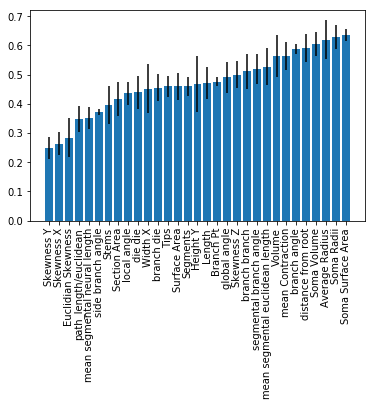

In [33]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""
values = np.zeros([3,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeature[i,:].mean()
    values[1,i] = masterFeature[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
values[2] = index
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceNeuron.eps', dpi=300, bbox_inches = 'tight')
plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceNeuron.png', dpi=300, bbox_inches = 'tight')

In [8]:
#clf = svm.SVC()
#clf = RandomForestClassifier()
clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
#clf = BaggingClassifier(DecisionTreeClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [9]:
size = 10
train = np.concatenate((trainG,trainP,trainS,trainB,trainT))
test = np.concatenate((testG,testP,testS,testB,testT))
y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size,[4] * size))

In [14]:
mas = []
accuracy=0
while accuracy<0.9:
    clf.fit(train,y)
    z = clf.predict(test)
    sum = 0
    parts = 5
    for i in range (0,parts) :
        for j in range (0,size) :
            if z[j + size*i] == i :
                sum += 1
    accuracy = sum / len(z)
    mas.append(accuracy)
    print(sum,accuracy)

38 0.76
43 0.86
38 0.76
39 0.78
40 0.8
43 0.86
37 0.74
41 0.82
40 0.8
38 0.76
40 0.8
43 0.86
38 0.76
42 0.84
43 0.86
43 0.86
38 0.76
39 0.78
42 0.84
40 0.8
41 0.82
39 0.78
40 0.8
40 0.8
41 0.82
39 0.78
38 0.76
42 0.84
38 0.76
40 0.8
38 0.76
41 0.82
39 0.78
43 0.86
41 0.82
38 0.76
42 0.84
40 0.8
38 0.76
39 0.78
39 0.78
40 0.8
40 0.8
41 0.82
42 0.84
37 0.74
39 0.78
41 0.82
42 0.84
40 0.8
41 0.82
38 0.76
38 0.76
42 0.84
36 0.72
40 0.8
36 0.72
39 0.78
37 0.74
37 0.74
37 0.74
39 0.78
40 0.8
41 0.82
41 0.82
39 0.78
39 0.78
39 0.78
40 0.8
40 0.8
40 0.8
41 0.82
40 0.8
39 0.78
39 0.78
41 0.82
41 0.82
39 0.78
36 0.72
38 0.76
41 0.82
42 0.84
39 0.78
43 0.86
42 0.84
39 0.78
40 0.8
38 0.76
38 0.76
40 0.8
37 0.74
38 0.76
35 0.7
42 0.84
38 0.76
38 0.76
41 0.82
38 0.76
38 0.76
37 0.74
43 0.86
40 0.8
40 0.8
40 0.8
43 0.86
38 0.76
41 0.82
39 0.78
37 0.74
38 0.76
41 0.82
36 0.72
37 0.74
41 0.82
43 0.86
39 0.78
39 0.78
40 0.8
41 0.82
42 0.84
41 0.82
40 0.8
39 0.78
39 0.78
37 0.74
40 0.8
40 0.8
38 0.76
39 

In [15]:
print(np.sum(mas)/len(mas))

0.7904308390022676


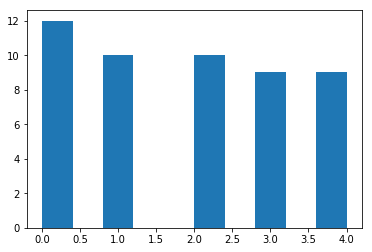

12
10
10
9
9


In [16]:
plt.hist(z)
plt.show()
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))
print(len(np.where(z == 2)[0]))
print(len(np.where(z == 3)[0]))
print(len(np.where(z == 4)[0]))

In [241]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 2556.110228
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 47.2690773, gradient norm = 0.5446401 (50 iterations in 0.047s)
[t-SNE] Iteration 100: error = 53.8421288, gradient norm = 0.5177170 (50 iterations in 0.041s)
[t-SNE] Iteration 150: error = 55.8091545, gradient norm = 0.5444755 (50 iterations in 0.035s)
[t-SNE] Iteration 200: error = 52.8675919, gradient norm = 0.4967975 (50 iterations in 0.034s)
[t-SNE] Iteration 250: error = 49.2314568, gradient norm = 0.5811211 (50 iterations in 0.035s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.231457
[t-SNE] Iteration 300: error = 1.1234940, gradient norm = 0.0016714 (50 iterations in 0.035s)
[t-SNE] Iteration 350: error = 0.8159049, gradient norm = 0.0031723 (5

ValueError: Invalid RGBA argument: 0

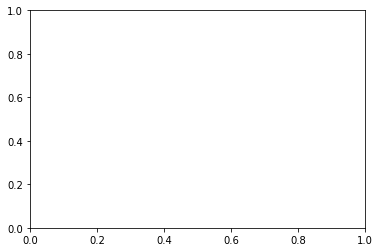

In [87]:
fig,ax = plt.subplots(1)
ax.scatter(X_embedded[:,0],X_embedded[:,1], c = y, s=50)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
fig.dpi=300
#fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronClassificationTSNE.eps')

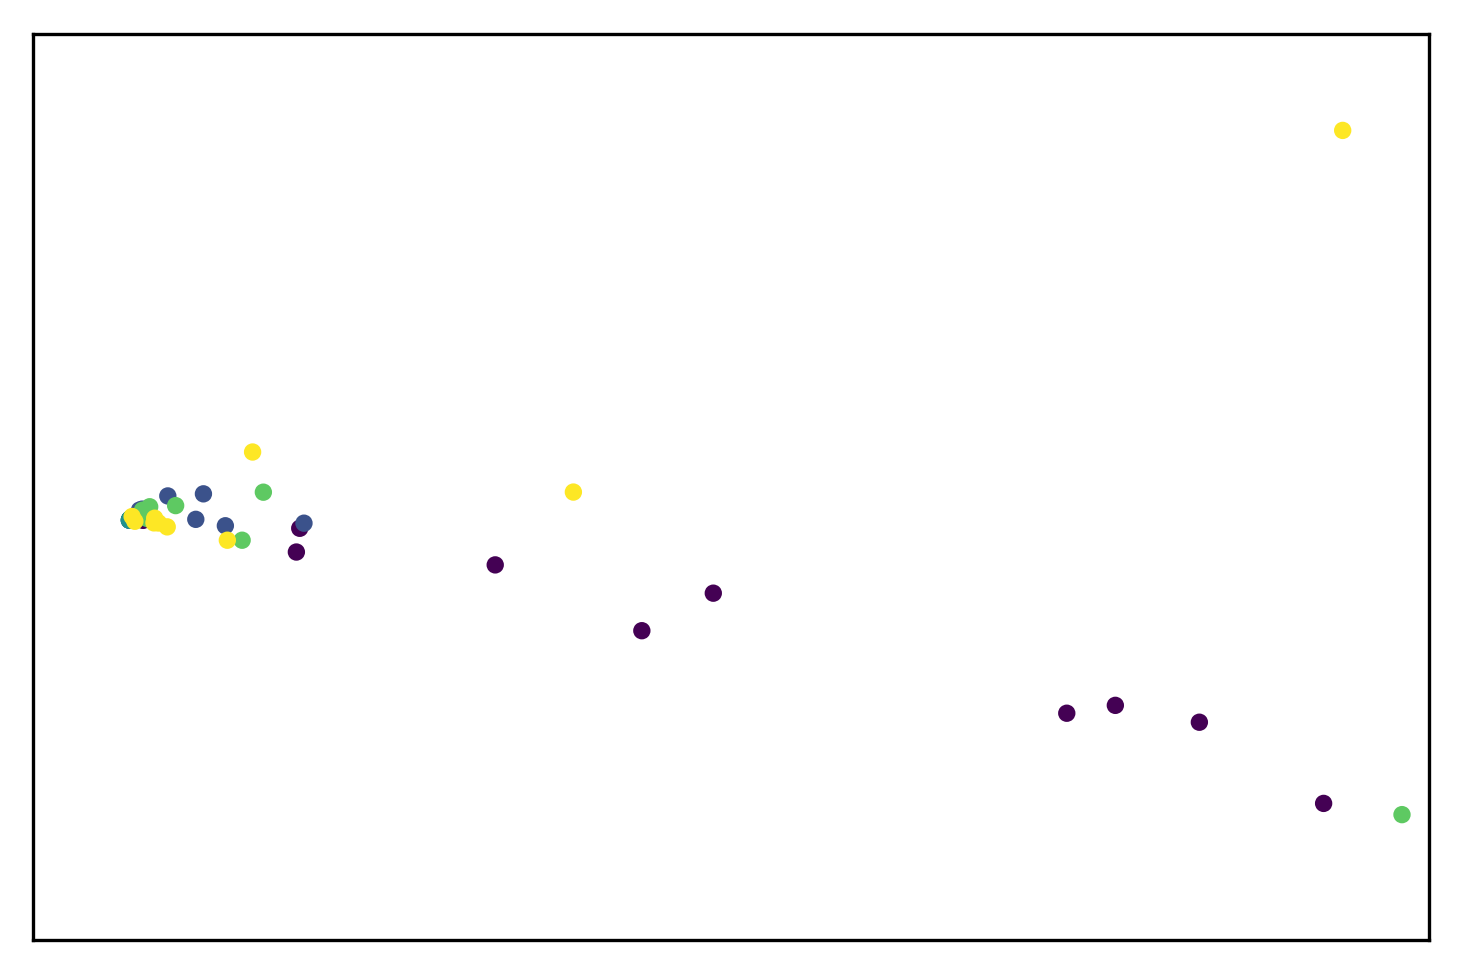

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train,y)
X_embedded = pca.fit_transform(train,y)

fig,ax = plt.subplots(1)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=10)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
ax.axis([-400000,1050000,-500000,600000])
fig.dpi=300
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronClassificationPCA.eps')
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronClassificationPCA.png')

In [22]:
def splitBranches(tree) :
    branches = np.where(tree.features['branch order']>=2)[0]
    numOfBranch = len(branches)
    subsets = [0] * numOfBranch
    for i in range(0,numOfBranch) :
        rest_swc = tree.get_rest_of_neuron_after_node(branches[i])
        n = McNeuron.Neuron(rest_swc)
        n.l_measure_features()
        n.motif_features()
        n.geometrical_features()
        n.l_measure_features()
        subsets[i] = n.getNeuronVector()
    return subsets

In [58]:
def getNeurons(swc, size) :
    rand = np.linspace(0,len(swc)-1,len(swc))
    n = [0] * size
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        n[i] = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
#         if i%10==0 :
#             print(i)
#     print('done')
    return np.array(n)

In [24]:
size = 20

neuronG = getNeurons(swcG, size)
neuronP = getNeurons(swcP, size)
neuronS = getNeurons(swcS, size)
neuronB = getNeurons(swcB, size)
neuronT = getNeurons(swcT, size)

0
10
done
0
10
done
0
10
done
0
10
done
0
10
done


In [57]:
def getNeuronBranchMaster(arr):
    neuronBranchMaster = [0] * len(arr)
    for i in range (0,len(arr)) :
        n = arr[i]
        n.basic_features()
        neuronBranchMaster[i] = splitBranches(n)
#         if i%10==0 :
#             print(i)
#     print('done')
    return neuronBranchMaster

In [26]:
neuronBranchMasterG = getNeuronBranchMaster(neuronG)
neuronBranchMasterP = getNeuronBranchMaster(neuronP)
neuronBranchMasterS = getNeuronBranchMaster(neuronS)
neuronBranchMasterB = getNeuronBranchMaster(neuronB)
neuronBranchMasterT = getNeuronBranchMaster(neuronT)

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:998: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['segmental branch angle'].mean())
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:990: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['local angle'].mean())


0
10
done
0
10
done
0
10
done
0
10
done
0
10
done


In [82]:
def removeBranchNaN(arr) :
    for i in range(0,len(arr)) :
        counter = 0
        for j in range(0,len(arr[i])) :
            if np.isnan(arr[i][j-counter]).any() :
                arr[i] = np.delete(arr[i],j-counter, axis=0)
                counter += 1
#                 print('good')
    return arr

def removeEmpty(array) :
    counter = 0
    for i in range(0,len(array)) :
        if array[i-counter]==[] :
            array = np.delete(array,i-counter)
            counter += 1
#             print('ha')
    return array

neuronBranchMasterG = removeBranchNaN(neuronBranchMasterG)
neuronBranchMasterG = removeEmpty(neuronBranchMasterG)
neuronBranchMasterP = removeBranchNaN(neuronBranchMasterP)
neuronBranchMasterP = removeEmpty(neuronBranchMasterP)
neuronBranchMasterS = removeBranchNaN(neuronBranchMasterS)
neuronBranchMasterS = removeEmpty(neuronBranchMasterS)
neuronBranchMasterB = removeBranchNaN(neuronBranchMasterB)
neuronBranchMasterB = removeEmpty(neuronBranchMasterB)
neuronBranchMasterT = removeBranchNaN(neuronBranchMasterT)
neuronBranchMasterT = removeEmpty(neuronBranchMasterT)

In [32]:
#clf = svm.SVC()
#clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
clf = BaggingClassifier(ExtraTreesClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [59]:
def appendtrees(arr) :
    branchMaster = arr[0]
    for i in range(1, len(arr)):
        branchMaster = np.append(branchMaster, arr[i],axis=0)
    return branchMaster

In [34]:
branchG = appendtrees(neuronBranchMasterG)
branchP = appendtrees(neuronBranchMasterP)
branchS = appendtrees(neuronBranchMasterS)
branchB = appendtrees(neuronBranchMasterB)
branchT = appendtrees(neuronBranchMasterT)

In [36]:
X = np.concatenate((branchG, branchP, branchS, branchB, branchT))
y = np.concatenate(([0] * len(branchG),[1] * len(branchP),[2] * len(branchS),[3] * len(branchB),[4] * len(branchT)))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [38]:
clf.fit(X_train,y_train)
z = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(z, y_test)

0.9493045387994143

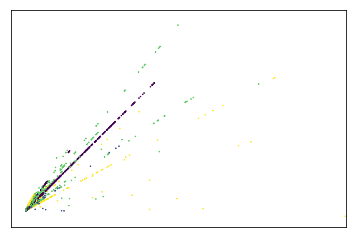

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train,y_train)
PCAArr = pca.fit_transform(X_train,y_train)

fig,ax = plt.subplots(1)
ax.scatter(PCAArr[:,0], PCAArr[:,1], c=y_train, s=.3, marker='x')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
ax.axis([-10000,100000,-20000,150000])
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronBranchClassificationPCA.eps', dpi = 300)
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronBranchClassificationPCA.png', dpi = 300)

In [46]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5464 samples in 0.028s...
[t-SNE] Computed neighbors for 5464 samples in 0.527s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5464
[t-SNE] Computed conditional probabilities for sample 2000 / 5464
[t-SNE] Computed conditional probabilities for sample 3000 / 5464
[t-SNE] Computed conditional probabilities for sample 4000 / 5464
[t-SNE] Computed conditional probabilities for sample 5000 / 5464
[t-SNE] Computed conditional probabilities for sample 5464 / 5464
[t-SNE] Mean sigma: 19.554297
[t-SNE] Computed conditional probabilities in 0.318s
[t-SNE] Iteration 50: error = 83.6760483, gradient norm = 0.0470513 (50 iterations in 8.434s)
[t-SNE] Iteration 100: error = 70.1710510, gradient norm = 0.0082339 (50 iterations in 6.879s)
[t-SNE] Iteration 150: error = 67.6387100, gradient norm = 0.0037530 (50 iterations in 6.651s)
[t-SNE] Iteration 200: error = 66.5983887, gradient norm = 0.0037163 (50 iterations in 6.359s)
[

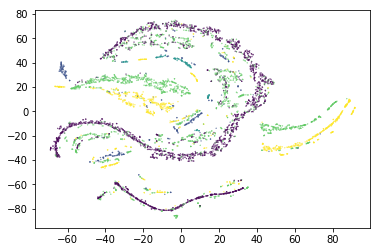

In [48]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train, s=0.1)
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronBranchClassificationTSNE.eps', dpi = 300)
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronBranchClassificationTSNE.png', dpi = 300)

In [83]:
def getBranchFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for l in range (0,length) :
        neuronG = getNeurons(swcG, size)
        neuronP = getNeurons(swcP, size)
        neuronS = getNeurons(swcS, size)
        neuronB = getNeurons(swcB, size)
        neuronT = getNeurons(swcT, size)
        
        neuronBranchMasterG = getNeuronBranchMaster(neuronG)
        neuronBranchMasterP = getNeuronBranchMaster(neuronP)
        neuronBranchMasterS = getNeuronBranchMaster(neuronS)
        neuronBranchMasterB = getNeuronBranchMaster(neuronB)
        neuronBranchMasterT = getNeuronBranchMaster(neuronT)
        print('done')
        
        neuronBranchMasterG = removeBranchNaN(neuronBranchMasterG)
        neuronBranchMasterG = removeEmpty(neuronBranchMasterG)
        neuronBranchMasterP = removeBranchNaN(neuronBranchMasterP)
        neuronBranchMasterP = removeEmpty(neuronBranchMasterP)
        neuronBranchMasterS = removeBranchNaN(neuronBranchMasterS)
        neuronBranchMasterS = removeEmpty(neuronBranchMasterS)
        neuronBranchMasterB = removeBranchNaN(neuronBranchMasterB)
        neuronBranchMasterB = removeEmpty(neuronBranchMasterB)
        neuronBranchMasterT = removeBranchNaN(neuronBranchMasterT)
        neuronBranchMasterT = removeEmpty(neuronBranchMasterT)
        print('done')
        
        branchG = appendtrees(neuronBranchMasterG)
        branchP = appendtrees(neuronBranchMasterP)
        branchS = appendtrees(neuronBranchMasterS)
        branchB = appendtrees(neuronBranchMasterB)
        branchT = appendtrees(neuronBranchMasterT)
        
        X = np.concatenate((branchG, branchP, branchS, branchB, branchT))
        y = np.concatenate(([0] * len(branchG),[1] * len(branchP),[2] * len(branchS),[3] * len(branchB),[4] * len(branchT)))
        for q in range(0,featureNum) :
            
            X_train, X_test, y_train, y_test = train_test_split(X[:,q], y, test_size=0.5, random_state=42)
            X_train = np.expand_dims(X_train,axis=1)
            X_test = np.expand_dims(X_test,axis=1)

            clf = ExtraTreesClassifier()
            clf.fit(X_train,y_train)
            z = clf.predict(X_test)
            masterFeature[q, l] = accuracy_score(z, y_test)
        print(l)
    return masterFeature

In [84]:
featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle']
featureNum = len(featureNames)
masterFeatureBranch = getBranchFeatureImportance(3, featureNum)

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:998: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['segmental branch angle'].mean())
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:990: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['local angle'].mean())


done
done
0


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:998: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['segmental branch angle'].mean())
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:990: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['local angle'].mean())


done
done
1


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:998: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['segmental branch angle'].mean())
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:990: RuntimeWarning: Mean of empty slice.
  n = np.append(n,self.features['local angle'].mean())


done
done
2


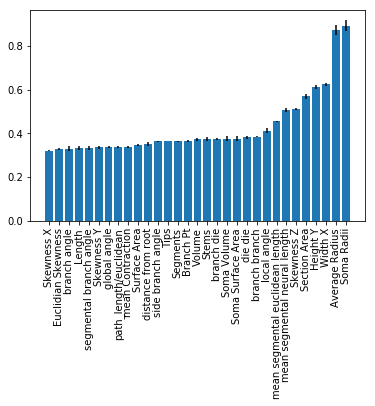

In [86]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""
values = np.zeros([2,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeatureBranch[i,:].mean()
    values[1,i] = masterFeatureBranch[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceNeuronBranch.eps', dpi=300, bbox_inches = 'tight')
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceNeuronBranch.png', dpi=300, bbox_inches = 'tight')